In [17]:
import geopandas as geopd
import pandas as pd
import process_stops as prostop
import make_stops_routes as makestop
from shapely.geometry import Point, LineString

In [18]:
stops_old = geopd.read_file("/home/data/results/stops.geojson")

In [19]:
stops_new = geopd.read_file("/home/data/results/GTFS_stops_processed.geojson")

In [20]:
stops_new[~stops_new.stop_id.isin(stops_old.stop_id)]

,stop_id,route_type,stop_name,stop_lat,stop_lon,routes_serviced,feed_name,GEOID_2010,GEOID_2020,geometry
435,100063,Bus,ALBANY CR/BAILEY AV,40.876877,-73.903177,BX2,google_transit_bronx,36005027700,36005027700,POINT (-73.90318 40.87688)
501,104341,Bus,E 149 ST/COURTLANDT AV,40.816704,-73.919881,BX2,google_transit_bronx,36005006500,36005006500,POINT (-73.91988 40.81670)
559,103390,Bus,BRUCKNER BL/CASTLE HILL AV,40.826904,-73.849379,BX5,google_transit_bronx,36005009800,36005009800,POINT (-73.84938 40.82690)
560,103391,Bus,BRUCKNER BL/HAVEMEYER AV,40.827309,-73.846393,BX5,google_transit_bronx,36005009800,36005009800,POINT (-73.84639 40.82731)
735,802167,Bus,Parking Ramp/Access Rd,40.865119,-73.828095,BX5,google_transit_bronx,36005046201,36005046205,POINT (-73.82810 40.86512)
...,...,...,...,...,...,...,...,...,...,...
16413,2576874,Bus,Old Williamsburg Rd at Rising Sun OB,37.23274,-76.54599,15221,williamsburg,51199050500,51199050500,POINT (-76.54599 37.23274)
16414,2576873,Bus,Old Williamsburg Rd at Woods of Yorktown,37.23425,-76.53737,15221,williamsburg,51199050500,51199050500,POINT (-76.53737 37.23425)
16415,2576885,Bus,Barham Blvd at Rivermeade,37.22678,-76.51867,15221,williamsburg,51199050500,51199050500,POINT (-76.51867 37.22678)
16416,2576884,Bus,Barham Blvd at Yorktown Square,37.22698,-76.52173,15221,williamsburg,51199050500,51199050500,POINT (-76.52173 37.22698)


In [21]:
stops_old[~stops_old.stop_id.isin(stops_new.stop_id)]

,CFLD_freq_quantile,CFLD_EALB,GEOID,access_to_hospital,stop_lon,BUILDVALUE,jobs_quantile,stop_name,stop_id,jobs,stop_lat,CFLD_damage_quantile,CFLD_AFREQ,geometry
13701,NaN,NaN,None,0,-74.104638,NaN,0,RICHMOND TER/SNUG HARBOR RD E,203222,1095.932458,40.645406,NaN,NaN,POINT (-74.10464 40.64541)
13702,NaN,NaN,None,0,-74.107643,NaN,0,RICHMOND TER/SNUG HARBOR RD W,203481,1074.454316,40.645327,NaN,NaN,POINT (-74.10764 40.64533)
13703,NaN,NaN,None,0,-74.110734,NaN,0,RICHMOND TER/DAVIS AV,200014,865.431661,40.644712,NaN,NaN,POINT (-74.11073 40.64471)
13835,NaN,NaN,None,0,-74.110946,NaN,0,RICHMOND TER/DAVIS AV,200035,719.976747,40.644473,NaN,NaN,POINT (-74.11095 40.64447)
13836,NaN,NaN,None,0,-74.108868,NaN,0,RICHMOND TER/BARD AV,200036,1250.920305,40.645002,NaN,NaN,POINT (-74.10887 40.64500)
13837,NaN,NaN,None,0,-74.104765,NaN,0,RICHMOND TER/SNUG HARBOR RD E,202532,1095.932458,40.645241,NaN,NaN,POINT (-74.10477 40.64524)
17860,2.0,0.000000,36047005602,0,-74.035969,2.279020e+08,0,Gowanus Exp./Lee Av (S.B.),805031,1615.228763,40.609459,0.0,4.439920,POINT (-74.03597 40.60946)
17861,2.0,0.000000,36047005602,0,-74.035969,2.279020e+08,0,Gowanus Exp./Lee Av (S.B.),805031,1615.228763,40.609459,0.0,4.439920,POINT (-74.03597 40.60946)
17862,2.0,0.000000,36047005602,0,-74.035969,2.279020e+08,0,Gowanus Exp./Lee Av (S.B.),805031,1615.228763,40.609459,0.0,4.439920,POINT (-74.03597 40.60946)
17863,2.0,0.000000,36047005602,0,-74.035969,2.279020e+08,0,Gowanus Exp./Lee Av (S.B.),805031,1615.228763,40.609459,0.0,4.439920,POINT (-74.03597 40.60946)


<AxesSubplot:>

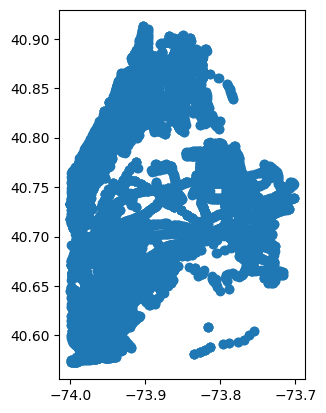

In [30]:
stops_old[stops_old["stop_lon"].astype(float) > -74].plot()

In [31]:
stops_old

,CFLD_freq_quantile,CFLD_EALB,GEOID,access_to_hospital,stop_lon,BUILDVALUE,jobs_quantile,stop_name,stop_id,jobs,stop_lat,CFLD_damage_quantile,CFLD_AFREQ,geometry
0,0.0,1.356579,36005029500,0,-73.909444,518566000.0,2,RIVERDALE AV/W 231 ST,104109,8114.965575,40.881505,0.0,0.011968,POINT (-73.90944 40.88150)
1,0.0,1.356579,36005029500,0,-73.909444,518566000.0,2,RIVERDALE AV/W 231 ST,104109,8114.965575,40.881505,0.0,0.011968,POINT (-73.90944 40.88150)
2,1.0,190.287109,36005028900,0,-73.907304,531278000.0,2,W 231 ST/CORLEAR AV,102995,8420.408504,40.880164,1.0,0.017952,POINT (-73.90730 40.88016)
3,1.0,190.287109,36005028900,0,-73.907304,531278000.0,2,W 231 ST/CORLEAR AV,102995,8420.408504,40.880164,1.0,0.017952,POINT (-73.90730 40.88016)
4,1.0,190.287109,36005028900,0,-73.907304,531278000.0,2,W 231 ST/CORLEAR AV,102995,8420.408504,40.880164,1.0,0.017952,POINT (-73.90730 40.88016)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23084,0.0,4.460602,51700031602,0,-76.469469,619298000.0,3,J CLYDE MORRIS & FORREST,3193,2308.245418,37.075817,0.0,0.007984,POINT (-76.46947 37.07582)
23085,0.0,4.460602,51700031602,0,-76.471970,619298000.0,3,J CLYDE MORRIS & IMPALA,3192,1803.131349,37.074843,0.0,0.007984,POINT (-76.47197 37.07484)
23086,0.0,2591.459952,51810045406,0,-76.095849,825764000.0,3,ROSEMONT & BUCKNER,1360,2251.643785,36.788017,2.0,4.413968,POINT (-76.09585 36.78802)
23087,0.0,2591.459952,51810045406,1,-76.097354,825764000.0,3,PRINCESS ANNE & CONCERT,3190,2383.762316,36.779734,2.0,4.413968,POINT (-76.09735 36.77973)


In [2]:
BASE_PATHS = ["/home/data/transit_feed_data/mta_feeds/", "/home/data/transit_feed_data/hrt_feeds/"]

In [3]:
prostop.make_stops_test(BASE_PATHS[1] + "hrt")

,stop_id,route_type,stop_name,stop_lat,stop_lon,geometry,routes_serviced,feed_name
0,1796,Bus,NORTHGATE COMMERCE & INDUSTRIAL,36.809747,-76.475228,POINT (-76.47523 36.80975),980,hrt
1,1728,Bus,JOLLIFF LANDING & PORTSMOUTH,36.815348,-76.448865,POINT (-76.44886 36.81535),980,hrt
2,5697,Bus,VICTORY CROSSING,36.809444,-76.352698,POINT (-76.35270 36.80944),"980, 057, 050, 045, 044, 041",hrt
3,1550,Bus,COUNTY & COURT,36.8339,-76.299099,POINT (-76.29910 36.83390),"980, 050, 045, 041, 047, 043",hrt
4,1551,Bus,PORT CENTRE & BART,36.83128,-76.300825,POINT (-76.30083 36.83128),"980, 045, 041",hrt
...,...,...,...,...,...,...,...,...
2692,5995,Bus,GREAT NECK & LYNNHAVEN,36.908519,-76.067329,POINT (-76.06733 36.90852),029,hrt
2693,1303,Bus,GREAT NECK & WILLOW OAK,36.910138,-76.067577,POINT (-76.06758 36.91014),029,hrt
2694,5666,Bus,MARSH PAVILION,36.815019,-75.988565,POINT (-75.98856 36.81502),031,hrt
2695,2925,Bus,GENERAL BOOTH & BOSHER,36.804682,-75.996253,POINT (-75.99625 36.80468),031,hrt


In [ ]:
makestop.make_stops(BASE_PATHS[1] + "hrt", "bus")

In [ ]:
boros = ['hrt']
r = []
s = []
for b in boros:
    r_tmp = pd.read_csv(f'/home/data/transit_feed_data/hrt_feeds/{b}/trips.txt', dtype = "str")
    r_tmp['route_type'] = 'bus'
    s_tmp = pd.read_csv(f'/home/data/transit_feed_data/hrt_feeds/{b}/shapes.txt', dtype = "str")
    r.append(r_tmp)
    s.append(s_tmp)

r = pd.concat(r)
s = pd.concat(s)

In [ ]:
route_shapes = r.groupby(['route_id','direction_id','shape_id','route_type']).count().reset_index().sort_values(
    ['route_id','direction_id','service_id','route_type'],ascending=False).drop_duplicates(
    subset=['route_id','direction_id'])[['route_id','direction_id','shape_id','route_type']]

trips_to_include = route_shapes.merge(trips)
trips_with_stops = trips_to_include.merge(stop_times)

In [ ]:
trips_with_stops

In [ ]:
routes = pd.read_csv("/home/data/transit_feed_data/hrt_feeds/hrt/routes.txt", dtype = "str")
stops = pd.read_csv("/home/data/transit_feed_data/hrt_feeds/hrt/stops.txt", dtype = "str")
trips = pd.read_csv("/home/data/transit_feed_data/hrt_feeds/hrt/trips.txt", dtype = "str")
stop_times = pd.read_csv("/home/data/transit_feed_data/hrt_feeds/hrt/stop_times.txt", dtype = "str")


In [ ]:
mode_trips = trips[["route_id", "service_id"]].groupby(["route_id"]).agg(pd.Series.mode).reset_index()
trips_to_include = mode_trips.merge(trips, on = "route_id").query("service_id_y.isin(service_id_x)")[["route_id", "trip_id"]]


In [ ]:
trips_with_stops = trips_to_include.merge(stop_times)

In [ ]:
trips[trips["route_id"] == "001"].groupby(["service_id", "shape_id"]).count().reset_index()

In [ ]:
stop_times

In [ ]:
routes[~routes["route_id"].isin(mode_trips.route_id)]

In [ ]:
trips

In [ ]:
stop_times